[Open in colab](https://colab.research.google.com/github/jkitchin/f21-06623/blob/master/practice/notebooks/selecting-roots-with-events.ipynb)



## Selecting roots with events



Back in 2013, there was no solve\_ivp function in scipy.integrate. At that time, I wrote a [blog post](https://kitchingroup.cheme.cmu.edu/blog/2013/01/28/Mimicking-ode-events-in-python/) on mimicking events in Python. This code block shows how to find the roots of the polynomial $f(x) = x^3 + 6 x^2 - 4 x - 24$ from that post. The gist is you integrate the derivative, and use an event to find where the solution is equal to zero.



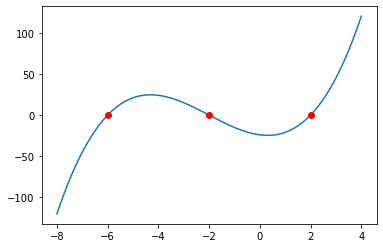

In [1]:
def ode(x, f):
    return 3 * x**2 + 12 * x - 4

def event(x, f):
    return f

from scipy.integrate import solve_ivp

sol = solve_ivp(ode, (-8, 4), (-120,), max_step=0.15, events=event)


import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y.T)
plt.plot(sol.t_events[0], sol.y_events[0], 'ro');

The practice problem today is how to define the event to select one of the roots. These roots are partially differentiable by considering the direction that one approaches the zero from. In the middle root, you approach it from a positive direction, and after the root, the event function is negative. For the smallest and largest roots, the event is negative before the root and positive after the root.



### Select the middle root



| <matplotlib.lines.Line2D | at | 0x7fe7422cbf10> |

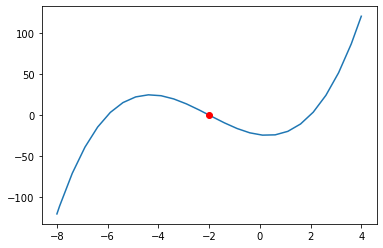

### Select the other two roots



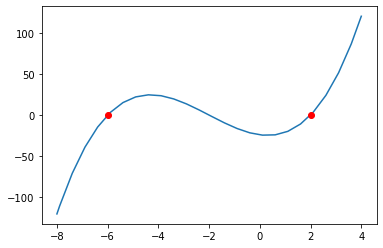

### Can we select a single root from the smallest and largest roots? Sort of&#x2026;



The difference at each of these is related to the second derivative. In the case of the smallest root the second derivative is negative, and in the case of the largest root it is positive at the root.

The second derivative is analytically defined here:

$f''(x) = 6 x + 12$

The question is, how do we incorporate this information into the event?

Remember that we need an event that changes sign so we can find the zero, and we need to be able to say what direction we approach the zero from.

So, here goes. In the smallest root, we have approach the zero from negative values of f to positive values of f, and, the curvature (second derivative is negative). At the root, f=0, so f times anything will also be zero. So, we can define the event to be the value of f times the second derivative of f (which will be negative for the smallest root, but positive for the largest root.) What does that mean for the event direction? Well, it means we can now differentiate the two roots. Let us take a look at the event function applied to our solution.



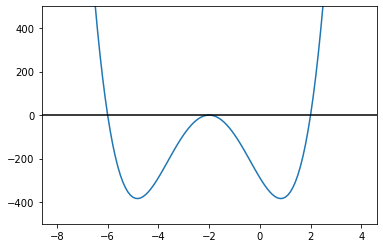

In [1]:
def event(x, f):
    fpp = 6 * x + 12
    return f[0] * fpp

plt.plot(sol.t, event(sol.t, sol.y))
plt.axhline(0, color='k')
plt.ylim([-500, 500]);

This shows you that the event is equal to 0 at three places, as it was before. The first place the event approaches zero from positive to negative around x = -6. The second time (near x = -2), the event is negative, approaches zero, and then is negative again. This event, although equal to 0 at x=-2, is not detectable, because it does not change sign. The third event at x=2, the event goes from negative to positive.

This means, we can use the direction to choose the first or the last root, but with this event function, it will turn out that you cannot detect the middle event anymore because the event does not change sign there. Bummer&#x2026;



[array([-6.,  2.])]

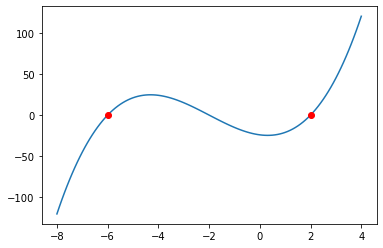

In [1]:
def event(x, f):
    fpp = 6 * x + 12
    return f[0] * fpp

event.direction = 0

sol = solve_ivp(ode, (-8, 4), (-120,), max_step=0.1, events=event)

plt.plot(sol.t, sol.y.T)
plt.plot(sol.t_events[0], sol.y_events[0], 'ro');
print(sol.t_events)

Still, use this to select the smallest root.



[array([-6.])]

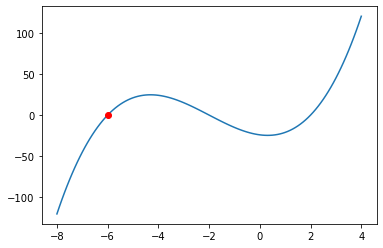

And the largest root:



[array([2.])]

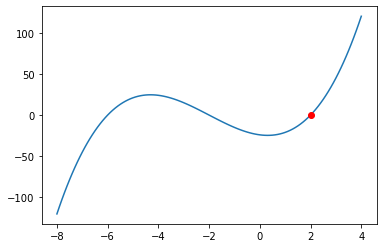

Take home lessions:

1.  By leveraging mathematical insight and cleverness, we were able to construct an event function that allows us to select the smallest or largest root based on the curvature at those points.
2.  To get the middle point we have to use the original method, and not the modified event. In the modified event, there is no sign change at the zero, the event is negative before and after the event.



## Solutions



[Open in colab](https://colab.research.google.com/github/jkitchin/f21-06623/blob/master/practice/solutions/selecting-roots-with-events.ipynb)

